# Project description


Ask a buyer to describe their dream home and they probably won't start with basement ceiling height or proximity to an east-west rail line. But the data set from this playground contest proves that price negotiations are influenced by much more than the number of bedrooms or a white picket fence.

![](https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png)

This dataset contains 79 explanatory variables describing almost every aspect of residential homes in Ames, Iowa. 

**Goal:** It is your job to predict the sales price for each house using everything you have learned so far. If **you use a model not presented in class, you must justify it, explain how it works and describe precisely the role of each of the hyper-parameters**. For each Id in the test set, you must predict the value of the SalePrice variable. 

**Metric:** Predictions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

**Homework submission**: You must upload a zip archive containing 3 files to``lms.univ-cotedazur.fr`:

* A `pdf` report describing for each of the selected features the treatment performed
* A `jupyter notebook` performing the preprocessing, each step of which is inserted into a sklearn or imblearn pipeline (you must leave traces of notebook executions. The first cell should have the number 1, the second the number 2, etc.)
* A `result.csv` should contain your prediction for each of the properties in tthe test set in the the following format:
<pre>
        Id,SalePrice
        1461,169000.9876
        1462,187724.1233
        1463,175221.1928
        etc.
</pre>

The scale will be as follows:
* 8 points on the quality of the preprocessing and its description from the report 
* 8 points on the quality and correctness of the code contained in the notebook
* 4 points on the quality of the model produced

Here's a brief version of what you'll find in the data description file.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

more detail about the features on `data_description.txt`files

# Data Loading

First, we will load the data from the given csv(comma seperated values) file provided as part of the Project.

In [1]:
# Read train files
import pandas as pd

df_train = pd.read_csv("train.csv", index_col=0)
print(len(df_train))
df_train.head(3)

1000


MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  

[3 rows x 80 columns]

In [2]:
# Read test file
df_test = pd.read_csv("test.csv", index_col=0)
print(len(df_test))
df_test.head(3)

460


MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
id                                                                      
1000          20       RL         74.0    10206   Pave   NaN      Reg   
1001          30       RL         60.0     5400   Pave   NaN      Reg   
1002          20       RL         75.0    11957   Pave   NaN      IR1   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC Fence  \
id                                    ...                                     
1000         Lvl    AllPub    Corner  ...           0        0    NaN   NaN   
1001         Lvl    AllPub    Corner  ...           0        0    NaN   NaN   
1002         Lvl    AllPub    Inside  ...           0        0    NaN   NaN   

     MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
id                                                                 
1000         NaN       0       7    2009        WD         Normal  
1001         NaN       0       1    2007        WD        Abnorml  
1002         NaN       0       7    2008        WD         Normal  

[3 rows x 79 columns]

In [3]:
# Save your predictions
df_results = pd.DataFrame(index=[1461,1462,1463],data={'SalePrice':[169000.9876,187724.1233,187724.1233]})
df_results.to_csv("results.csv", index_label='id')
df_results.head()

SalePrice
1461  169000.9876
1462  187724.1233
1463  187724.1233

# 1.Libraries

In [4]:
# This Python 3 environment comes with many helpful analytics libraries
# Here's several helpful packages to load

# Linear algebra
import numpy as np

# Data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd

# Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
import matplotlib.pyplot as plt

# A linear regression model describes the relationship between a dependent variable, y, and one or more independent variables, X.
from sklearn.linear_model import LinearRegression

# A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
from sklearn.ensemble import RandomForestRegressor

#Mean Absolute Error (MAE) is calculated by taking the summation of the absolute difference between the actual and calculated values of each observation over the entire array and then dividing the sum obtained by the number of observations in the array.
from sklearn.metrics import mean_absolute_error

# Splitting between train- and test set
from sklearn.model_selection import train_test_split

#Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures.
import seaborn as sns

# 2.Price Analysis

In [5]:
# let's see the data types of the features
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1000 non-null   int64  
 1   MSZoning       1000 non-null   object 
 2   LotFrontage    827 non-null    float64
 3   LotArea        1000 non-null   int64  
 4   Street         1000 non-null   object 
 5   Alley          65 non-null     object 
 6   LotShape       1000 non-null   object 
 7   LandContour    1000 non-null   object 
 8   Utilities      1000 non-null   object 
 9   LotConfig      1000 non-null   object 
 10  LandSlope      1000 non-null   object 
 11  Neighborhood   1000 non-null   object 
 12  Condition1     1000 non-null   object 
 13  Condition2     1000 non-null   object 
 14  BldgType       1000 non-null   object 
 15  HouseStyle     1000 non-null   object 
 16  OverallQual    1000 non-null   int64  
 17  OverallCond    1000 non-null   int64  
 18  YearBuilt

In the dataset, we have 1000 records and 80 columns, out of which

3 features are of float type
34 features are of integer type
43 feature is of object type

# Data Understanding

After loading data into our pandas library dataframe, we now try to understand the kind of data we have with us.

In [6]:
# print the number of records and features/aspects we have in the provided file
df_train.shape

(1000, 80)

In [7]:
df_train.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1000.000000    827.00000    1000.000000  1000.000000  1000.000000   
mean     56.880000     69.95526   10691.176000     6.125000     5.587000   
std      42.256375     23.20269   11412.668294     1.383217     1.108901   
min      20.000000     21.00000    1300.000000     1.000000     1.000000   
25%      20.000000     60.00000    7585.250000     5.000000     5.000000   
50%      50.000000     70.00000    9451.000000     6.000000     5.000000   
75%      70.000000     80.00000   11628.500000     7.000000     6.000000   
max     190.000000    313.00000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  BsmtFinSF2  ...  \
count  1000.000000   1000.000000   994.000000  1000.000000  1000.00000  ...   
mean   1971.633000   1985.279000   109.225352   445.214000    48.30100  ...   
std      30.007945     20.412296   188.885856   442.394927   165.78807  ...   
min    1880.000000   1950.000000     0.000000     0.000000     0.00000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.00000  ...   
50%    1974.000000   1994.000000     0.000000   384.500000     0.00000  ...   
75%    2000.250000   2004.000000   174.750000   725.000000     0.00000  ...   
max    2010.000000   2010.000000  1600.000000  2260.000000  1474.00000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1000.000000  1000.000000    1000.000000  1000.000000  1000.000000   
mean     97.353000    47.669000      21.413000     3.703000    15.055000   
std     124.392314    67.988557      60.696528    30.915733    55.467744   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     171.250000    70.000000       0.000000     0.000000     0.000000   
max     857.000000   523.000000     552.000000   508.000000   410.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1000.000000   1000.000000  1000.000000  1000.000000    1000.000000  
mean      1.160000     45.384000     6.307000  2007.830000  182284.451000  
std      26.103329    525.449337     2.691095     1.326974   80291.215207  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130000.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     648.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

# Feature selection

In [8]:
##Exploratory data analysis
##Correlation
df_train.corr()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.393658 -0.115279     0.041102    -0.057754   
LotFrontage     -0.393658     1.000000  0.373428     0.254518    -0.062835   
LotArea         -0.115279     0.373428  1.000000     0.099715     0.003108   
OverallQual      0.041102     0.254518  0.099715     1.000000    -0.094873   
OverallCond     -0.057754    -0.062835  0.003108    -0.094873     1.000000   
YearBuilt        0.029721     0.135066  0.004951     0.568318    -0.408921   
YearRemodAdd     0.043926     0.094174  0.012234     0.562643     0.071696   
MasVnrArea       0.015993     0.194859  0.080251     0.419337    -0.150098   
BsmtFinSF1      -0.062344     0.132859  0.194581     0.209785    -0.044847   
BsmtFinSF2      -0.034473     0.063094  0.120933    -0.046796     0.045831   
BsmtUnfSF       -0.153633     0.173626 -0.007978     0.320887    -0.147092   
TotalBsmtSF     -0.240881     0.345136  0.243116     0.539865    -0.184086   
1stFlrSF        -0.260312     0.430182  0.273731     0.478796    -0.155043   
2ndFlrSF         0.296825     0.065107  0.036708     0.308684     0.030562   
LowQualFinSF     0.057127     0.021563  0.000231    -0.040225     0.047130   
GrLivArea        0.068752     0.371528  0.231885     0.610512    -0.082731   
BsmtFullBath     0.029866     0.083674  0.165165     0.088604    -0.033389   
BsmtHalfBath    -0.010662     0.006651  0.061787    -0.036592     0.092979   
FullBath         0.134958     0.196259  0.128856     0.555574    -0.195241   
HalfBath         0.160106     0.063367 -0.007306     0.293890    -0.064336   
BedroomAbvGr    -0.020440     0.281054  0.099597     0.118349     0.018979   
KitchenAbvGr     0.268597    -0.020208 -0.024028    -0.182539    -0.090433   
TotRmsAbvGrd     0.022150     0.344028  0.161788     0.452100    -0.063717   
Fireplaces      -0.025217     0.250990  0.266890     0.395043    -0.023711   
GarageYrBlt      0.081520     0.077040 -0.035490     0.545669    -0.336570   
GarageCars      -0.051261     0.324913  0.138767     0.638169    -0.181047   
GarageArea      -0.116582     0.353598  0.149891     0.592268    -0.143590   
WoodDeckSF      -0.024661     0.094912  0.182296     0.239211     0.021675   
OpenPorchSF      0.012560     0.138227  0.061517     0.314292    -0.024665   
EnclosedPorch   -0.017735     0.049860 -0.010237    -0.105513     0.055631   
3SsnPorch       -0.040800     0.080108  0.012324     0.016857     0.005032   
ScreenPorch     -0.015886     0.051980  0.043920     0.092738     0.062814   
PoolArea        -0.013268     0.106321  0.024137     0.024369    -0.018844   
MiscVal         -0.019086    -0.003101  0.031380    -0.033367     0.084780   
MoSold           0.026961    -0.008894  0.006856     0.087834    -0.025899   
YrSold          -0.033033     0.024313 -0.015487    -0.022223     0.041353   
SalePrice       -0.081252     0.371281  0.265493     0.797666    -0.095816   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.029721      0.043926    0.015993   -0.062344   -0.034473   
LotFrontage     0.135066      0.094174    0.194859    0.132859    0.063094   
LotArea         0.004951      0.012234    0.080251    0.194581    0.120933   
OverallQual     0.568318      0.562643    0.419337    0.209785   -0.046796   
OverallCond    -0.408921      0.071696   -0.150098   -0.044847    0.045831   
YearBuilt       1.000000      0.571433    0.326947    0.238930   -0.035047   
YearRemodAdd    0.571433      1.000000    0.186238    0.124104   -0.071096   
MasVnrArea      0.326947      0.186238    1.000000    0.248342   -0.068379   
BsmtFinSF1      0.238930      0.124104    0.248342    1.000000   -0.041570   
BsmtFinSF2     -0.035047     -0.071096   -0.068379   -0.041570    1.000000   
BsmtUnfSF       0.150579      0.177900    0.114250   -0.526150   -0.202435   
TotalBsmtSF     0.395489      0.289738    0.353746    0.477429    0.135909   
1stFlrSF        0.291125      0.2403

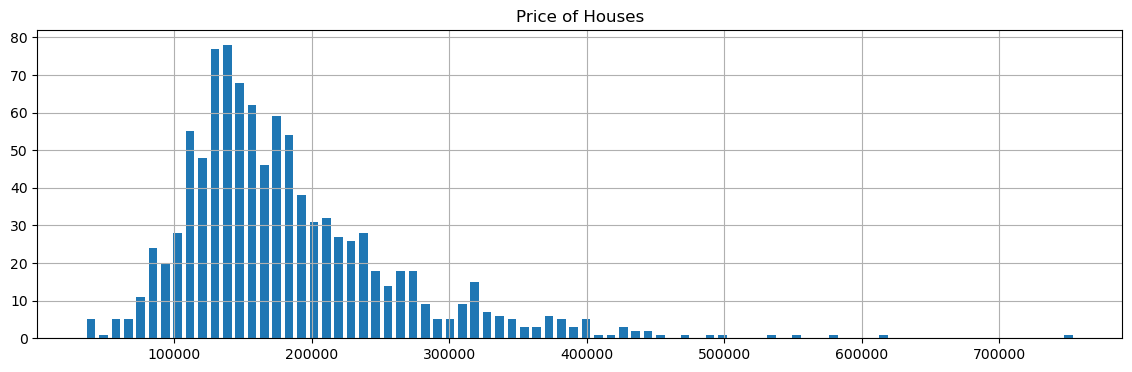

In [9]:
#Show the price of Houses
df_train.SalePrice.hist(bins=80,rwidth=0.7,figsize=(14,4))
plt.title('Price of Houses')
plt.show()

In [10]:
#We are interested in Sale price
y = df_train.SalePrice

In [11]:
#Let's see some correlations between qualitative values

df_train.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.797666
GrLivArea        0.734997
GarageCars       0.658204
GarageArea       0.647953
TotalBsmtSF      0.642127
1stFlrSF         0.627749
TotRmsAbvGrd     0.570375
FullBath         0.559980
YearBuilt        0.527193
YearRemodAdd     0.526195
GarageYrBlt      0.493995
MasVnrArea       0.492889
Fireplaces       0.473011
BsmtFinSF1       0.389868
LotFrontage      0.371281
2ndFlrSF         0.325329
WoodDeckSF       0.324953
OpenPorchSF      0.319551
HalfBath         0.304008
LotArea          0.265493
BsmtUnfSF        0.221219
BsmtFullBath     0.216566
BedroomAbvGr     0.173287
ScreenPorch      0.140744
MoSold           0.039314
PoolArea         0.012493
3SsnPorch        0.009682
BsmtFinSF2       0.000359
BsmtHalfBath    -0.009389
LowQualFinSF    -0.028580
YrSold          -0.030562
MiscVal         -0.039521
MSSubClass      -0.081252
OverallCond     -0.095816
EnclosedPorch   -0.111712
KitchenAbvGr    -0.132654
Name: SalePrice, dtype: float64

Initial Considerations:
Looking forward to our columns, we found some variables which can have an high correlation with our main variable SalePrice:
OverallQual      0.797666
GrLivArea        0.734997
GarageCars       0.658204
GarageArea       0.647953
TotalBsmtSF      0.642127
YearBuilt        0.527193

Heatmap Correlation Matrix

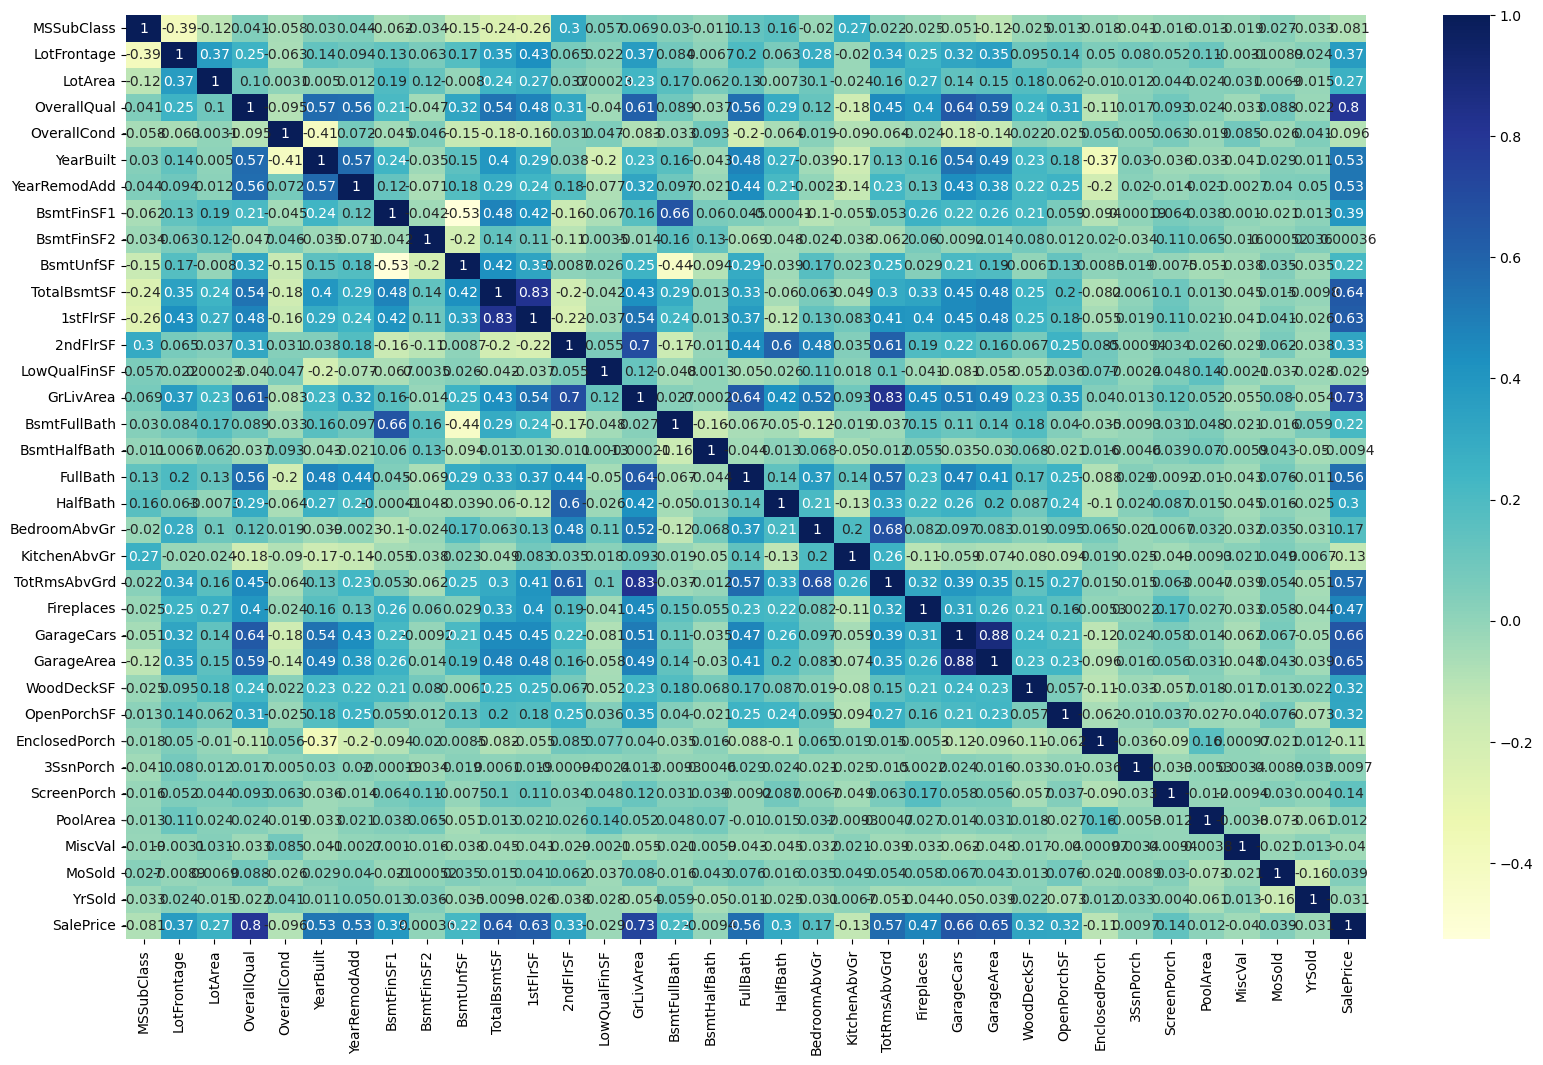

In [46]:
plt.figure(figsize=(20,12));
sns.heatmap(df_train.corr(),cmap="YlGnBu",annot=True);

Using this kind of plot we can deduce if there's some collinearity between 2 variables

By knowling the meaning of these pair of variables seems trivial to notice a collinearity.
Let's restrict our matrix by considering the variable having more than 0.4 correlation ratio.

# Plotting of Some important features

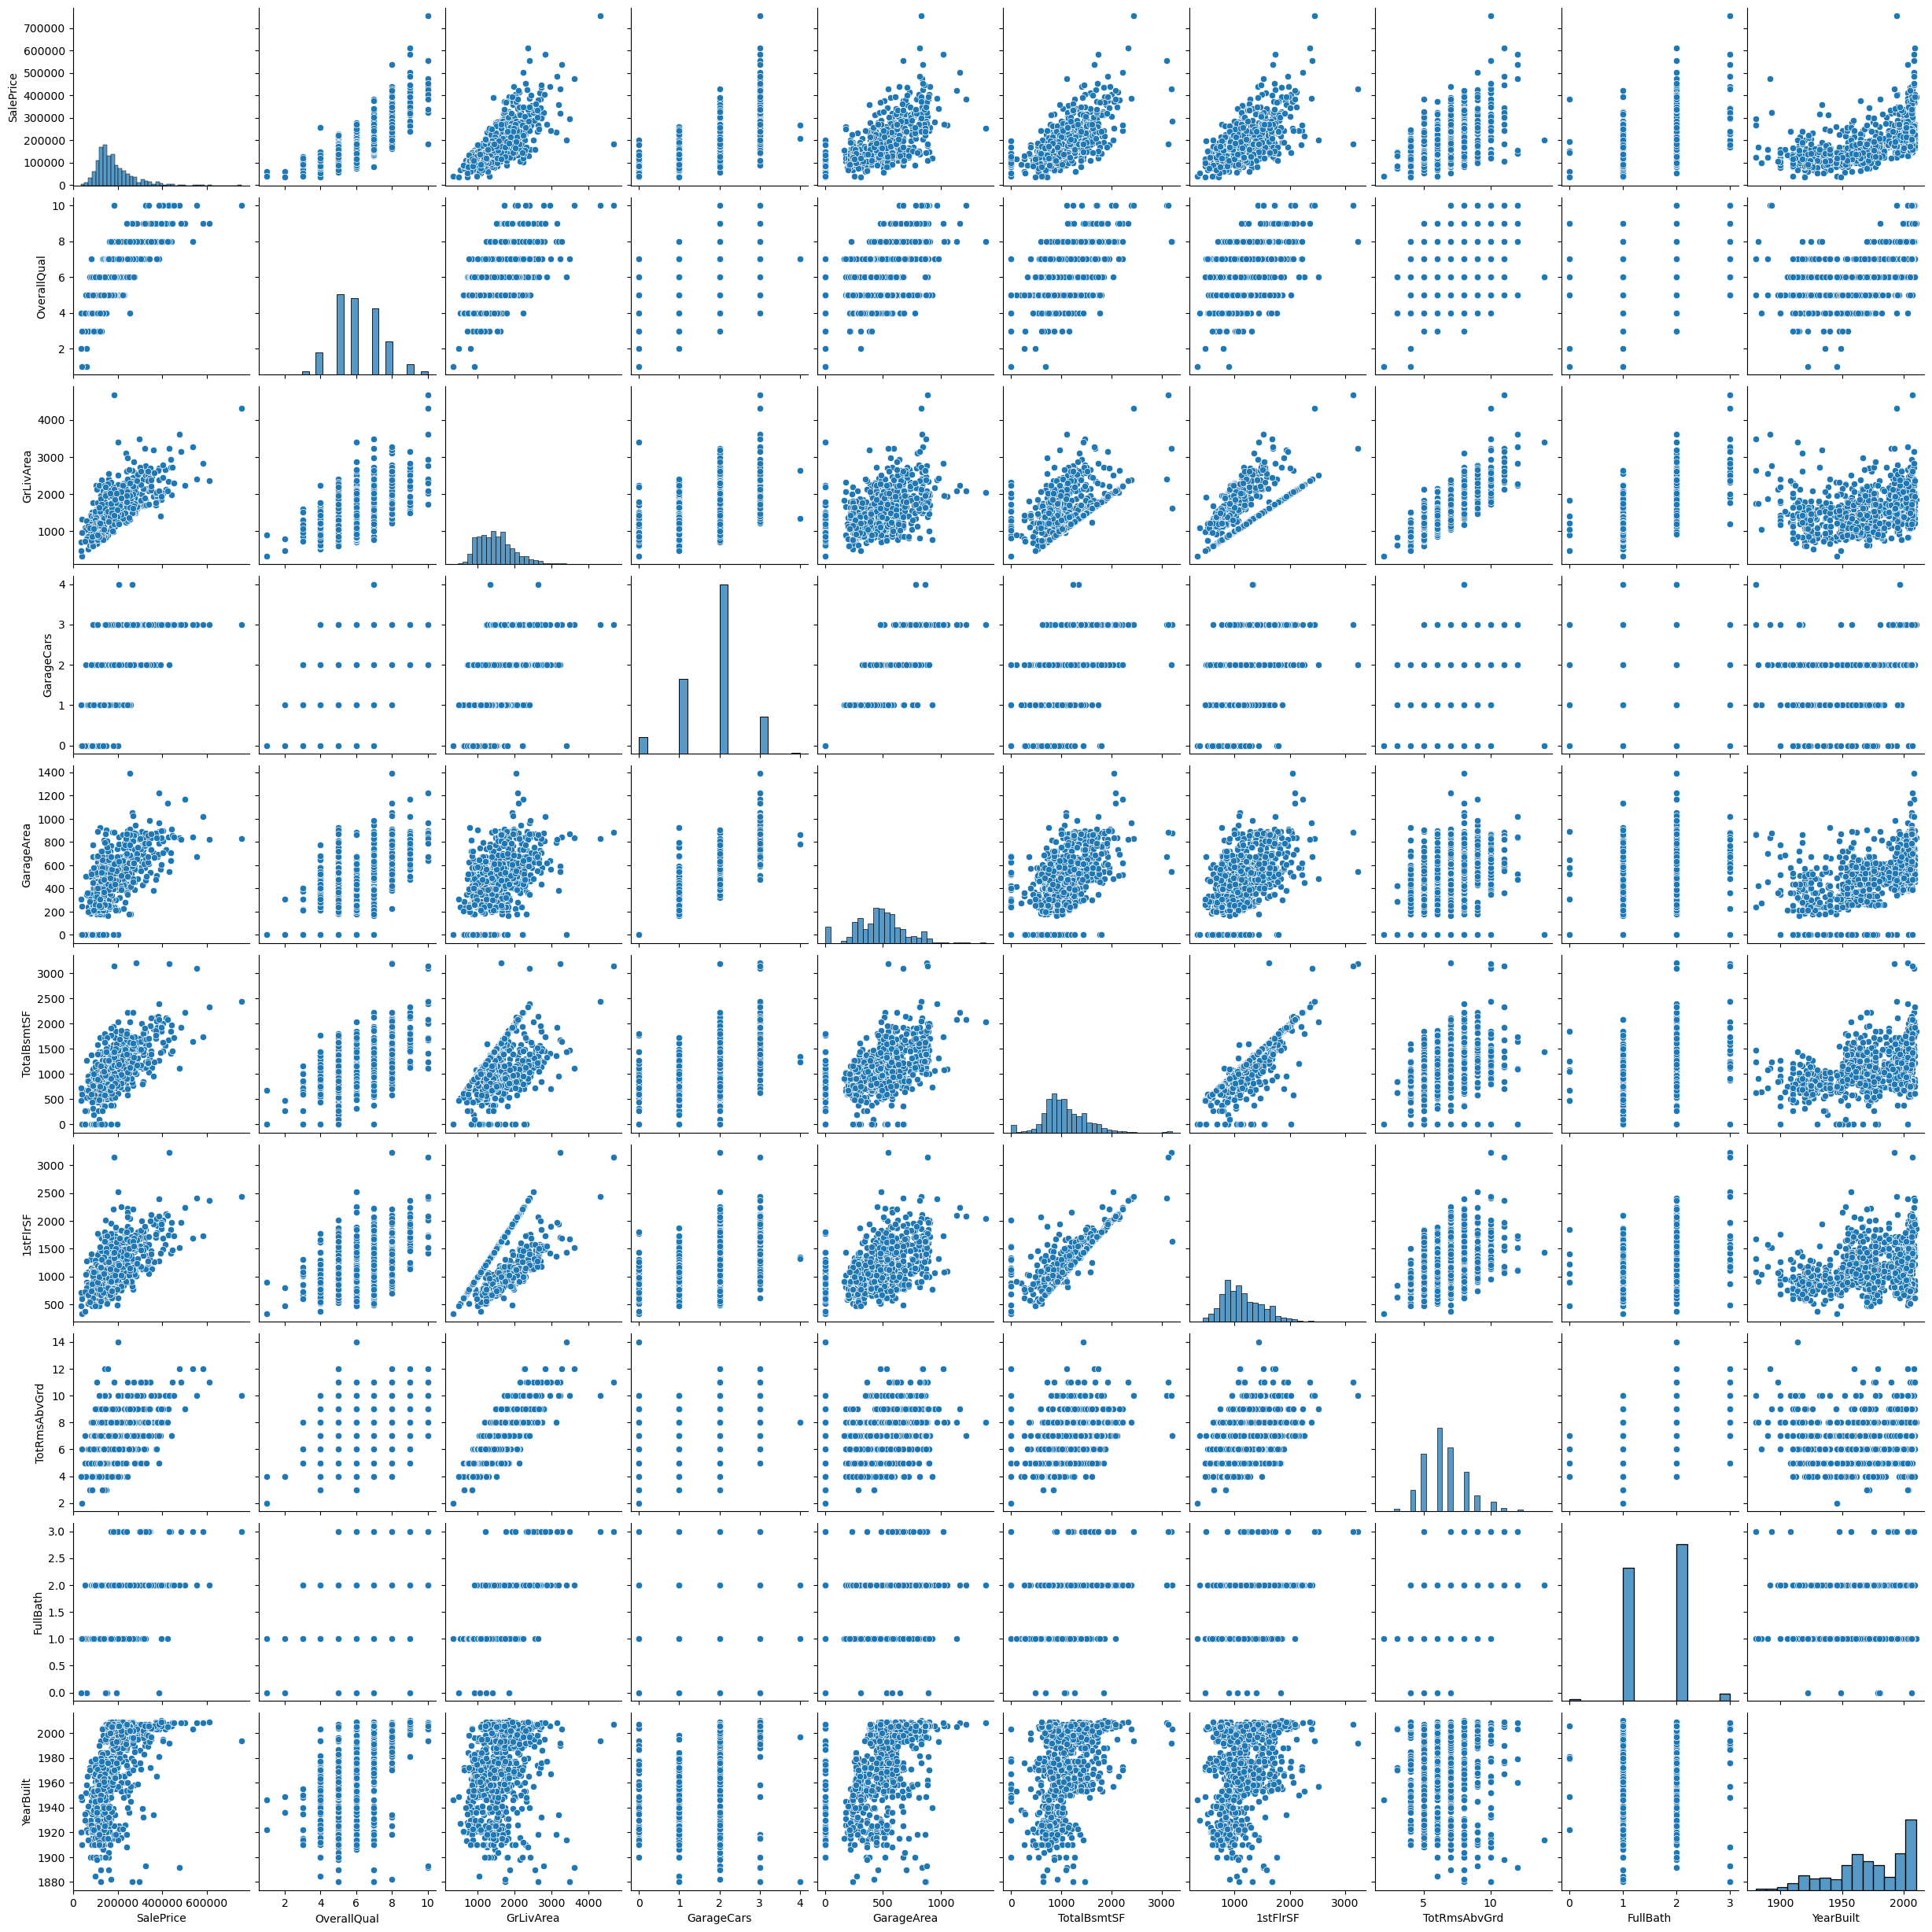

In [13]:
sns.pairplot(df_train[["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF","TotRmsAbvGrd", "FullBath", "YearBuilt"]])

Analyzing Feature: OverallQual & SalePrice

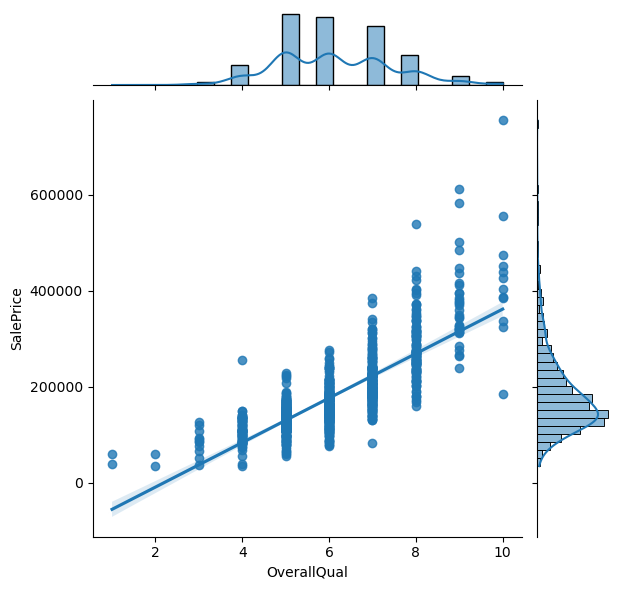

In [14]:
sns.jointplot(x = "OverallQual", y = "SalePrice", data = df_train, kind = "reg");

Analyzing Feature: GrLivArea & SalePrice

Text(0, 0.5, 'SalePrice')

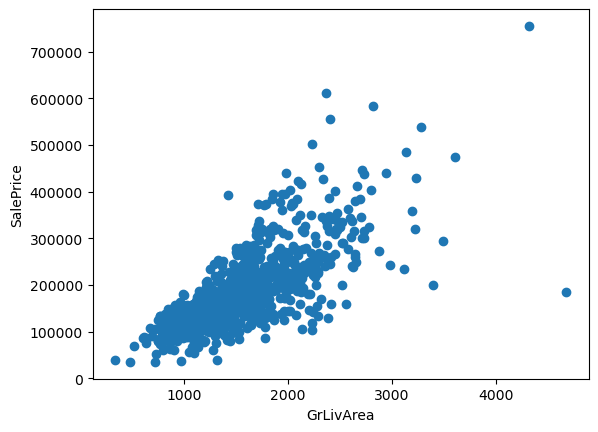

In [15]:
plt.scatter(df_train["GrLivArea"],df_train["SalePrice"])   
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")

Analyzing Feature: GarageCars & SalePrice

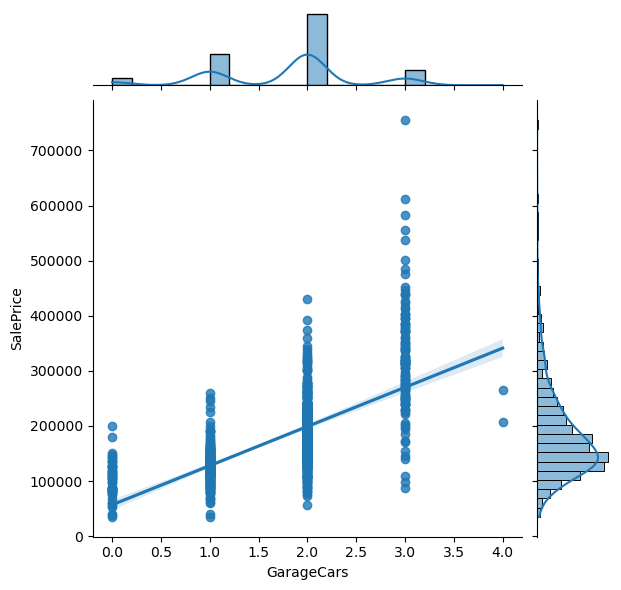

In [16]:
sns.jointplot(x = "GarageCars", y = "SalePrice", data = df_train, kind = "reg");

Analyzing Feature: GarageArea & SalePrice

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

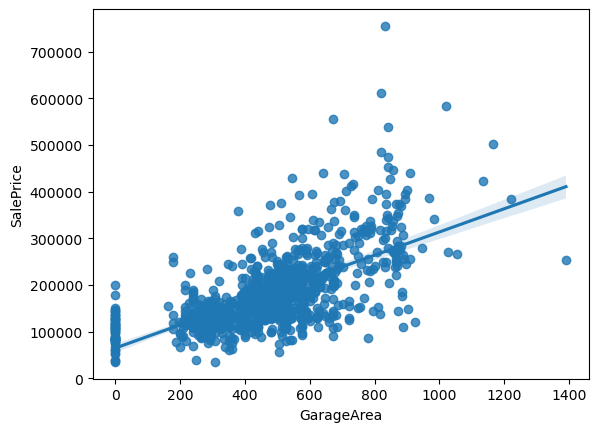

In [17]:
sns.regplot(x="GarageArea",y="SalePrice",data=df_train)

Analyzing Feature: TotalBsmtSF & SalePrice

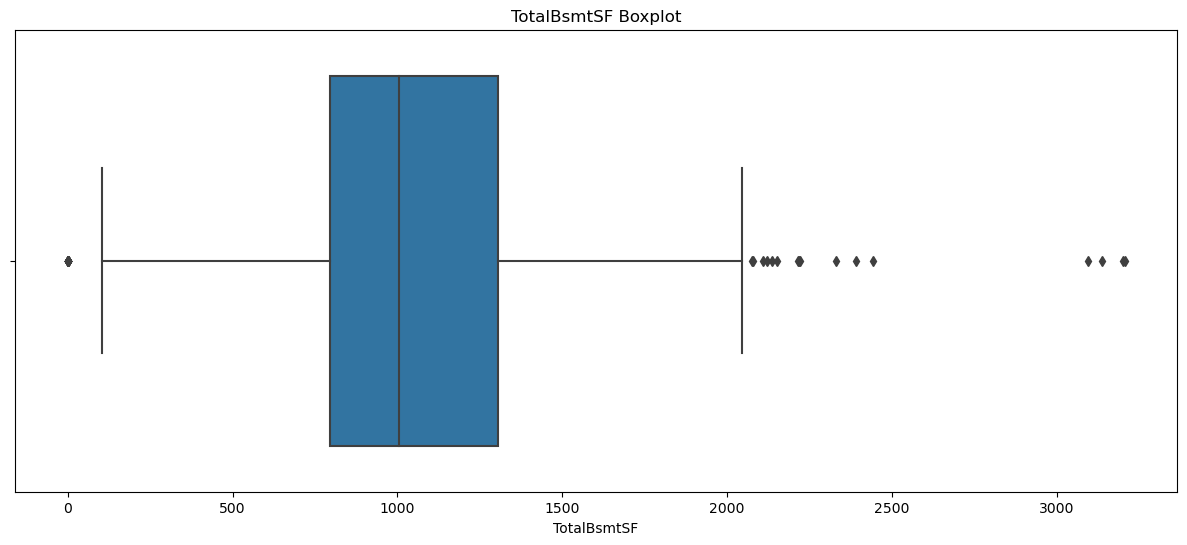

In [18]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df_train['TotalBsmtSF'])

plt.title('TotalBsmtSF Boxplot');

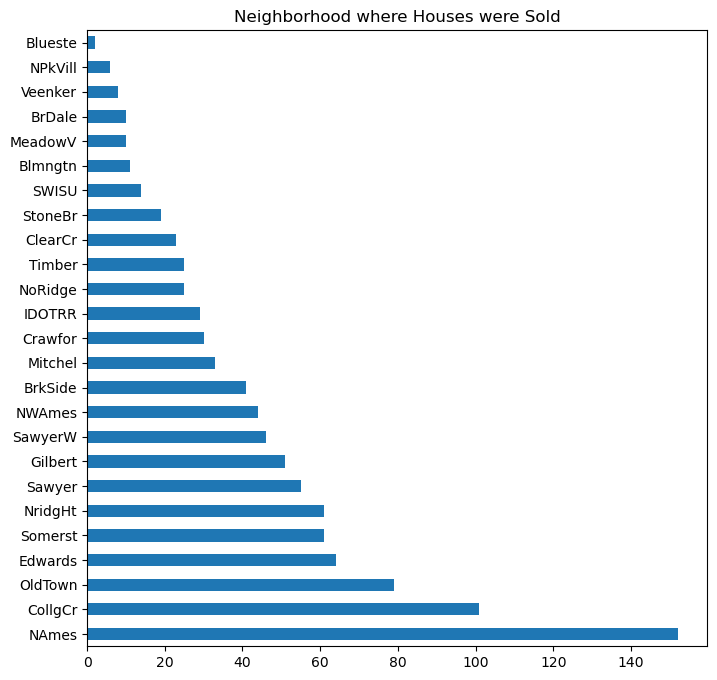

In [19]:
plt.figure(figsize=(8,8));
df_train['Neighborhood'].value_counts().plot(kind='barh');
plt.title('Neighborhood where Houses were Sold');

Analyzing Feature: YearBuilt & SalePrice

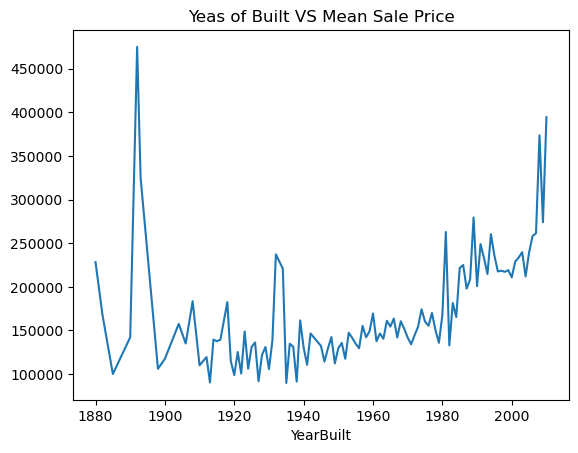

In [20]:
df_train.groupby(['YearBuilt'])['SalePrice'].mean().plot();
plt.title('Yeas of Built VS Mean Sale Price');

# 3.Data Processing

# Feature Engineering For Improvement

In [21]:
#Picking the ones with >0.4 correlation with saleprice
features = ['OverallQual',
            'GrLivArea',
            'GarageCars',
            'GarageArea',
            'TotalBsmtSF',
            '1stFlrSF',
            'FullBath',
            'TotRmsAbvGrd',
            'YearBuilt',
            'YearRemodAdd',
            'GarageYrBlt',
            'MasVnrArea',
            'Fireplaces']

# Dealing With Missing Values in Train And Valid Data

In [22]:
#Null data in features
df_train[features].isnull().sum()

OverallQual      0
GrLivArea        0
GarageCars       0
GarageArea       0
TotalBsmtSF      0
1stFlrSF         0
FullBath         0
TotRmsAbvGrd     0
YearBuilt        0
YearRemodAdd     0
GarageYrBlt     56
MasVnrArea       6
Fireplaces       0
dtype: int64

*We have null or missing values for "GarageYrBlt" column*

In [23]:
#GarageYrBlt filling missing values with mean()
garage_yr_blt_mean = df_train['GarageYrBlt'].mean()
print(garage_yr_blt_mean)

#Too many decimals
garage_yr_blt_mean = '%.2f'%(garage_yr_blt_mean)
print(garage_yr_blt_mean)

#Filling
df_train['GarageYrBlt'].fillna(value=garage_yr_blt_mean, inplace = True)

1978.6811440677966
1978.68


In [24]:
#Same with MasVnrArea
mva_mean = df_train['MasVnrArea'].mean()
print(mva_mean)

#Too many decimals again
mva_mean = '%.2f'%(mva_mean)
print(mva_mean)

#Filling
df_train['MasVnrArea'].fillna(value=mva_mean, inplace=True)

109.22535211267606
109.23


In [25]:
#Let's get some results

# y = data.SalePrice
X = df_train[features]

rf_model =RandomForestRegressor(random_state=1)
rf_model.fit(X,y)
print("Success")

Success


In [26]:
#Checking if it worked
df_train[features].isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
GarageYrBlt     0
MasVnrArea      0
Fireplaces      0
dtype: int64

There are no null values in the df_train

In [27]:
#Bring in the test data
test_data = pd.read_csv('test.csv')
test_data

id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    1000          20       RL         74.0    10206   Pave   NaN      Reg   
1    1001          30       RL         60.0     5400   Pave   NaN      Reg   
2    1002          20       RL         75.0    11957   Pave   NaN      IR1   
3    1003          90       RL          NaN    11500   Pave   NaN      IR1   
4    1004         120       RL         43.0     3182   Pave   NaN      Reg   
..    ...         ...      ...          ...      ...    ...   ...      ...   
455  1455          60       RL         62.0     7917   Pave   NaN      Reg   
456  1456          20       RL         85.0    13175   Pave   NaN      Reg   
457  1457          70       RL         66.0     9042   Pave   NaN      Reg   
458  1458          20       RL         68.0     9717   Pave   NaN      Reg   
459  1459          20       RL         75.0     9937   Pave   NaN      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0           Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
1           Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
2           Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
3           Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4           Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
..          ...       ...  ...         ...      ...    ...    ...         ...   
455         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
456         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
457         Lvl    AllPub  ...           0        0    NaN  GdPrv        Shed   
458         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
459         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         0      7    2009        WD         Normal  
1         0      1    2007        WD        Abnorml  
2         0      7    2008        WD         Normal  
3         0      6    2007        WD         Normal  
4         0      5    2009        WD         Normal  
..      ...    ...     ...       ...            ...  
455       0      8    2007        WD         Normal  
456       0      2    2010        WD         Normal  
457    2500      5    2010        WD         Normal  
458       0      4    2010        WD         Normal  
459       0      6    2008        WD         Normal  

[460 rows x 80 columns]

# Dealing With Missing Values in Test And Valid Data

In [28]:
#Null data in features
df_test[features].isnull().sum()

OverallQual      0
GrLivArea        0
GarageCars       0
GarageArea       0
TotalBsmtSF      0
1stFlrSF         0
FullBath         0
TotRmsAbvGrd     0
YearBuilt        0
YearRemodAdd     0
GarageYrBlt     25
MasVnrArea       2
Fireplaces       0
dtype: int64

In [29]:
#Quickly do the same fillnas for all the test_data

#GarageCars only 1 to fill, let's give it a 0
df_test['GarageCars'].fillna(value=0, inplace = True)

#GarageArea only 1 to fill, let's give it also a 0
df_test['GarageArea'].fillna(value=0, inplace = True)

#TotalBsmtSF same than above -> 0
df_test['TotalBsmtSF'].fillna(value=0, inplace = True)

#GarageYrBlt 25 to fill, let's give it mean()
gyb_mean = df_test['GarageYrBlt'].mean()
gyb_mean = '%.2f'%(gyb_mean)
df_test['GarageYrBlt'].fillna(value=gyb_mean, inplace = True)

#MasVnrArea 2 to fill, Let's given it mean()
mvatest_mean = df_test['MasVnrArea'].mean()
mvatest_mean = '%.2f'%(mvatest_mean)
df_test['MasVnrArea'].fillna(value=mvatest_mean, inplace = True)

In [30]:
#Checking if all worked and there are no more missing values..
df_test[features].isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
GarageYrBlt     0
MasVnrArea      0
Fireplaces      0
dtype: int64

Splitting the dataset into traing and testing set
20% of the dataset will be used for testing(evaluation) and 80% of the data will be used for training purposes

# 4.Models:

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40 )

1.Linear Regression

Creating and training the machine learning model

In [32]:
linearmodel = LinearRegression()
linearmodel.fit(X_train,y_train)

LinearRegression()

Now Predictions

In [33]:
linear_prediction = linearmodel.predict(X_test)
linear_prediction

array([ 98742.44388019,  94394.41534904, 109879.05603688, 176989.68698842,
       167736.8628125 , 250782.8681485 , 233760.70140985, 221712.04246659,
       311998.39245106,  42649.90126847, 175402.98737896, 148573.62782615,
       162365.79417061, 202663.22604278, 201628.13650539, 210515.70596528,
       193683.5264401 , 226613.44780062, 287607.16437327, 117712.15769435,
       164931.34498822, 246578.1208054 , 207724.44054866, 133184.22693017,
       225279.62397683, 166754.07655948,  93037.99530476,  77469.75926408,
       143029.32289279,  97706.32910381, 207645.88009844, 289363.38691816,
       199064.83132675,  99111.88388472,  70366.02210161, 176190.18720707,
       282737.93286254,  89178.74429798, 164933.75958457, 153477.30791967,
       204453.71178656, 131981.85637292, 139704.25482712, 107878.77765689,
       220786.58620387, 221133.24088273,  99917.12381595, 119865.3325019 ,
       244153.69397826,  97844.03600035, 199888.29118526, 320274.7364379 ,
       324888.40920641, 1

In [34]:
linearmodel.score(X,y)

0.8150408323641144

As we can see this model's accuracy is 0.81

2.Random Forest

In [35]:
regressor = RandomForestRegressor(n_estimators=300, random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=0)

In [36]:
random_prediction = regressor.predict(X_test)
random_prediction

array([116462.29      , 127561.02833333, 125547.56      , 164408.69666667,
       144989.76666667, 235149.18      , 202360.05      , 203636.96333333,
       321312.00666667,  83026.22777778, 193499.1       , 142878.54      ,
       165371.33333333, 170679.66666667, 166302.55      , 194082.24333333,
       184615.35      , 219266.37      , 315919.07333333, 132752.74666667,
       152867.15      , 239745.75666667, 191471.40666667, 131790.85      ,
       220077.81      , 163322.52333333,  98306.71333333,  96560.40333333,
       136002.32333333, 115099.09333333, 202448.83333333, 274225.69333333,
       176442.22      , 126037.54333333, 103733.26      , 174021.71      ,
       279675.84666667, 119132.25333333, 157905.76666667, 152998.83333333,
       171842.02      ,  94458.74      , 139155.54666667, 125648.85      ,
       219077.71333333, 195183.36666667, 116084.055     , 114460.03666667,
       238998.57666667, 126950.34666667, 227717.16333333, 327541.19333333,
       309842.75      , 1

In [37]:
regressor.score(X,y)

0.9570937046743201

As we can see this model's accuracy is 0.957

In [38]:
print("sucesses")

sucesses


In [39]:
#Making the predictions with the test data
test_X = df_test[features]
test_predictions = rf_model.predict(test_X)

Now lets create a new dataframe just to predict salesprice

In [40]:
#Making a dataframe with ID and prediction SalePrices
output = pd.DataFrame({'Id': test_data.id,
                       'SalePrice': test_predictions})

In [41]:
output.describe

<bound method NDFrame.describe of        Id  SalePrice
0    1000   91954.12
1    1001   83426.08
2    1002  254583.60
3    1003  164726.95
4    1004  202089.86
..    ...        ...
455  1455  181052.00
456  1456  219394.22
457  1457  261318.23
458  1458  125784.55
459  1459  140724.00

[460 rows x 2 columns]>

# 5.Conclusions

Comparing the accuracy scores between linear regression and the Random Forest model, Random forest model appears to be the most accurate.

# Finally Converting Dataframe Into CSV

In [42]:
#Finally turn dataframe into csv

output.to_csv('result.csv', index=False)